# Exploring the Zoo-Animals dataset

At any point in this workbook, if you have something you'd like to share, 
- make a gist | push your changes to gh
- nbviewer will read from either and render the notebook https://nbviewer.jupyter.org/ 

[example](https://nbviewer.jupyter.org/github/rjbergerud/vic-machine-learning/blob/master/meet1/zoo-animals.ipynb)

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('zoo.csv')
classes = pd.read_csv('class.csv')

# Take a look at the first five rows of data
print(df.head())



  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Explore the data
Sometimes, we come at a dataset without knowing anything about it, and having no questions posed.  Doing some initial exploration of the data can help us find good questions to ask later.  This process is called [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis). 

We use tools from [description statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) and visualizations to get a better intuition on our sample.  There are a few examples here, but of course add some of your own in the cells afterwards.

### Matplotlib
Matplotlib is a library meant to mimic matlab-style plotting.  You build up a plot through a sequence of calls to the pyplot object (`plt` below), which keeps track of the data and options you set until you call `plt.show()`.

Index([u'hair', u'feathers', u'eggs', u'milk', u'airborne', u'aquatic',
       u'predator', u'toothed', u'backbone', u'breathes', u'venomous', u'fins',
       u'legs', u'tail', u'domestic', u'catsize'],
      dtype='object')


NameError: name 'x_ticks' is not defined

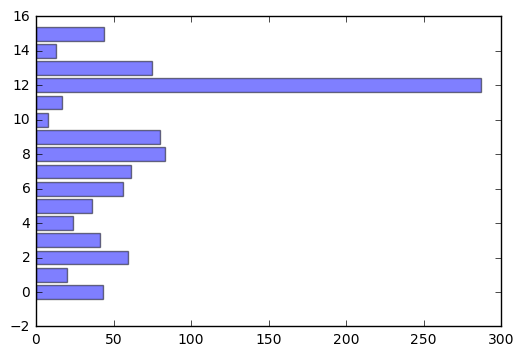

In [3]:
features = df.ix[:,1:-1]
features_total = features.sum()
feature_names = features_total.axes[0]
print(feature_names)
y_ticks = np.arange(len(feature_names))
plt.barh(y_ticks, features_total, align='center', alpha=0.5)
plt.yticks(x_ticks, feature_names)
plt.xlabel('# of species occuring with feature')
plt.ylabel('features')
plt.show()

In [ ]:
# Your code here


# Unfamiliar with matplotlib?  Stuck?  Checkout 
# https://www.kaggle.com/sarangkarpate/d/uciml/zoo-animal-classification/notebook8362945bc6

### Choosing a Classifier

Questions to ask before choosing a classifier:
- What type of data (continuous, discrete) am I using for my features
- What is my target data?  What type is it?
- Can the rules for classification given by the classifier be easily interpretable by a human-being (consider a tree-classifier vs. neurual network).

In [65]:
from sklearn.ensemble import RandomForestClassifier

## Split the data into features and target variables
X = features
Y = df["class_type"]

# Create instance of classifier
clf = RandomForestClassifier(n_estimators = 10)

# Fit or "train" the classifier 
clf = clf.fit(X,Y)

# Check out how it did 
# note, we'll talk about what's missing/wrong here soon
print("Classifier score: {}".format(clf.score(X,Y)))

# You can see how the classifier you've trained classifies different
# animals, and compare it to the real classification
aardvark = df.loc[0] #Aardvark
aardvark_features, aardvark_class = aardvark[1:-1], aardvark[-1:]
print("Predicted class for aardvark: {}".format(clf.predict(aardvark_features)[0]))
print("Actual class for aardvark: {}".format(aardvark_class[0]))

print(classes[['Class_Number', 'Class_Type']])


Classifier score: 1.0
Predicted class for aardvark: 1
Actual class for aardvark: 1
   Class_Number    Class_Type
0             1        Mammal
1             2          Bird
2             3       Reptile
3             4          Fish
4             5     Amphibian
5             6           Bug
6             7  Invertebrate


/media/rydertana/4b16cf63-5c01-4664-9954-fbb9dbaba9d1/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### What we're missing: testing

We've choosen a fairly small dataset here. What's wrong with that?

Resources used in ithis presentation: 
- [Understanding Exploratory Data Analysis](http://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/)
